In [1]:
import pandas as pd
df = pd.read_csv("churn.csv")
print(df.shape)
df.info()
df.head()


(10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.drop(["RowNumber", "CustomerId"], axis=1, inplace=True)

In [3]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [5]:
print(df.nunique())


Surname            2932
CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64


In [6]:
print("Unique Surnames: ", df['Surname'].nunique())
print("Unique countries: ", df['Geography'].unique())

Unique Surnames:  2932
Unique countries:  ['France' 'Spain' 'Germany']


In [7]:
df.drop('Surname', axis=1, inplace=True)

In [8]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

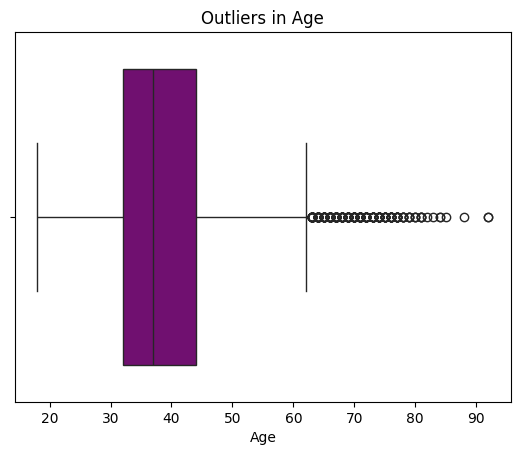

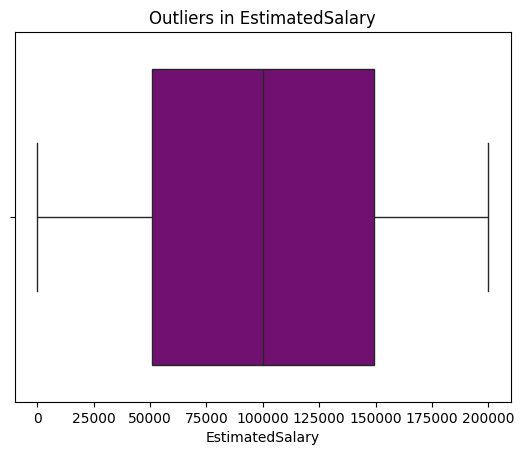

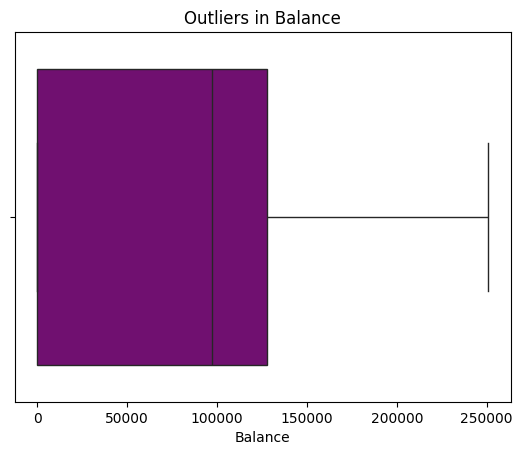

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age
sns.boxplot(x=df['Age'], color='purple')
plt.title("Outliers in Age")
plt.show()

# EstimatedSalary
sns.boxplot(x=df['EstimatedSalary'], color='purple')
plt.title("Outliers in EstimatedSalary")
plt.show()

# Balance
sns.boxplot(x=df['Balance'], color='purple')
plt.title("Outliers in Balance")
plt.show()

In [10]:
df[df['Balance'] == 0].shape

(3617, 11)

In [11]:
df[df['Balance'] == 0]['Exited'].value_counts(normalize=True)

0    0.861764
1    0.138236
Name: Exited, dtype: float64

In [12]:
df[df['Balance'] > 0]['Exited'].value_counts(normalize=True)

0    0.759204
1    0.240796
Name: Exited, dtype: float64

In [13]:
df['ZeroBalanceFlag'] = df['Balance'].apply(lambda x: 1 if x==0 else 0)

In [14]:
df[['Balance', 'ZeroBalanceFlag']].head(10)

,Balance,ZeroBalanceFlag
0,0.00,1
1,83807.86,0
2,159660.80,0
3,0.00,1
4,125510.82,0
5,113755.78,0
6,0.00,1
7,115046.74,0
8,142051.07,0
9,134603.88,0


In [15]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'ZeroBalanceFlag'],
      dtype='object')

In [16]:
Q1 = df['Age'].quantile(0.25)
Q3 =df['Age'].quantile(0.75)

IQR = Q3-Q1

lowerlimit = Q1 - 1.5*IQR
upperlimit = Q3 + 1.5*IQR

print("Lowerlimit", lowerlimit)
print("Upperlimit", upperlimit)

outliers = df[(df['Age'] < lowerlimit) | (df['Age'] > upperlimit)]
print("Outliers in Age:", outliers.shape[0])


Lowerlimit 14.0
Upperlimit 62.0
Outliers in Age: 359


In [17]:
df['Age'] = df['Age'].clip(lower=lowerlimit, upper=upperlimit)

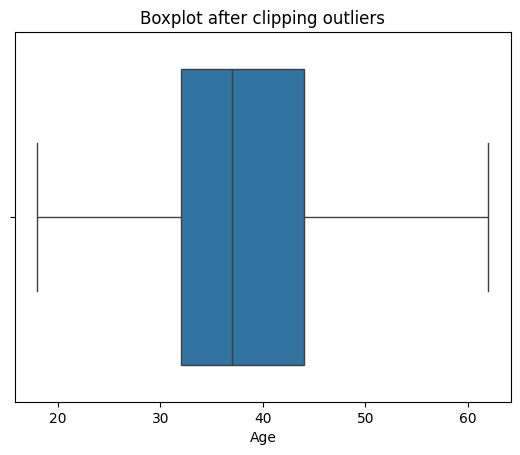

In [18]:
sns.boxplot(x=df['Age'])
plt.title("Boxplot after clipping outliers")
plt.show()

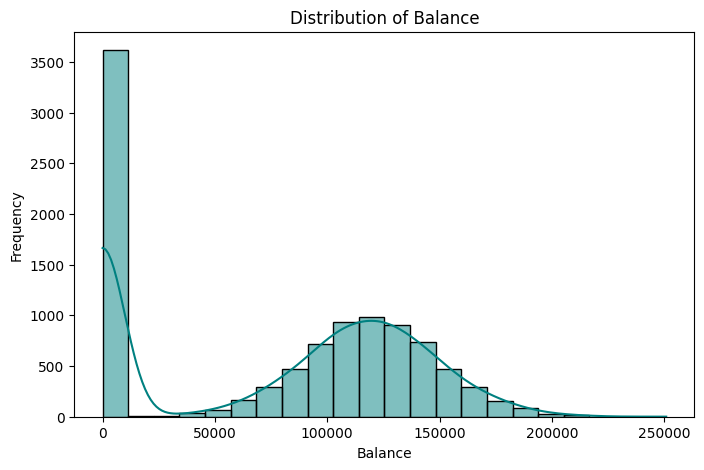

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['Balance'], kde=True, color='Teal')
plt.title("Distribution of Balance")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.show()

In [20]:
df.to_csv("cleaned_after_outliers.csv", index=False)

In [21]:
skewness = df['Balance'].skew()
print(f"Skewness of Balance: {skewness}")

Skewness of Balance: -0.14110871094154384


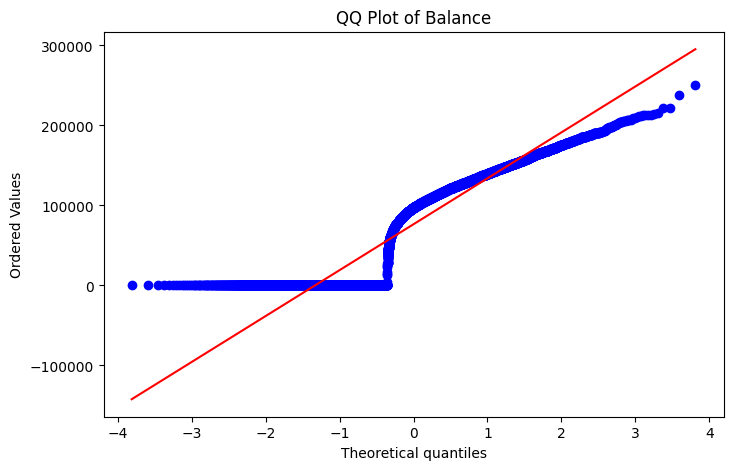

In [22]:
from scipy import stats

plt.figure(figsize=(8,5))
stats.probplot(df['Balance'], dist="norm", plot=plt)
plt.title("QQ Plot of Balance")
plt.show()


In [23]:
df['Balance'].mean(), df['Balance'].median()
#if mean > median then it is right skewed(positively skewed)

(76485.889288, 97198.54000000001)

In [24]:
import numpy as np

df["Log_Balance"] = df["Balance"].apply(lambda x: np.log(x+1))

# +1 is used to avoid log(0) errors,{log(0) is undefined}

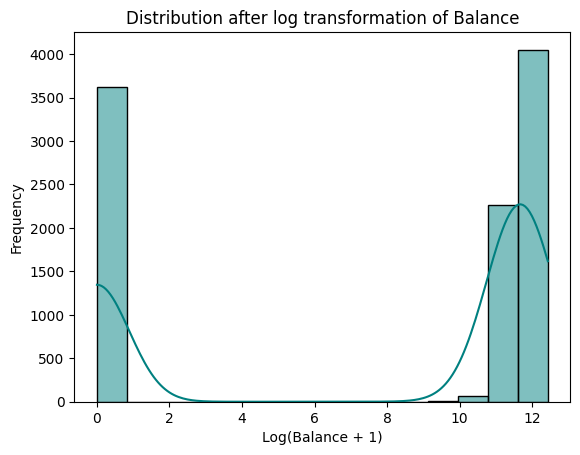

In [25]:
sns.histplot(df["Log_Balance"], kde=True, color='teal')
plt.title("Distribution after log transformation of Balance")
plt.xlabel("Log(Balance + 1)")
plt.ylabel("Frequency")
plt.show()


In [26]:
df["Log_Balance"].skew()

-0.5708284896191692

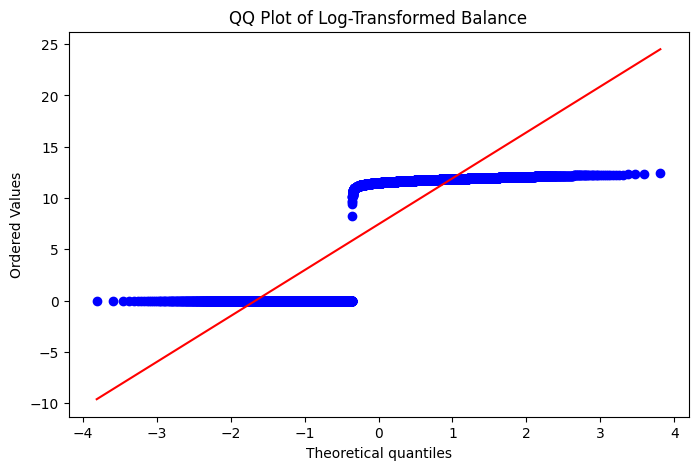

In [27]:
plt.figure(figsize=(8,5))
stats.probplot(df["Log_Balance"], dist="norm", plot=plt)
plt.title("QQ Plot of Log-Transformed Balance")
plt.show()

In [28]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'ZeroBalanceFlag', 'Log_Balance'],
      dtype='object')

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  #Female=0, Male=1 or vice versa {LabelEncoder for binary columns}

In [30]:
#For multi-category columns 
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

#drop_first=True avoids multicollinearity.

In [31]:
print(df.columns.tolist())

['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'ZeroBalanceFlag', 'Log_Balance', 'Geography_Germany', 'Geography_Spain']


In [32]:
df.drop(['Balance'], axis=1, inplace=True)


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary', 'Log_Balance']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [35]:
X = df.drop('Exited', axis=1)
Y = df['Exited']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [38]:
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[1546   61]
 [ 303   90]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      1607
           1       0.60      0.23      0.33       393

    accuracy                           0.82      2000
   macro avg       0.72      0.60      0.61      2000
weighted avg       0.79      0.82      0.78      2000



In [40]:
from imblearn.over_sampling import SMOTE

#Create a SMOTE object
sm = SMOTE(random_state=42)

X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

print("Before SMOTE:", Y_train.value_counts())
print("After SMOTE:", Y_train_res.value_counts())


Before SMOTE: 0    6356
1    1644
Name: Exited, dtype: int64
After SMOTE: 0    6356
1    6356
Name: Exited, dtype: int64


C:\Users\DEEPALI SHARMA\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, Y_train_res)

y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, y_pred_rf))
print(confusion_matrix(Y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1607
           1       0.59      0.61      0.60       393

    accuracy                           0.84      2000
   macro avg       0.74      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000

[[1437  170]
 [ 153  240]]


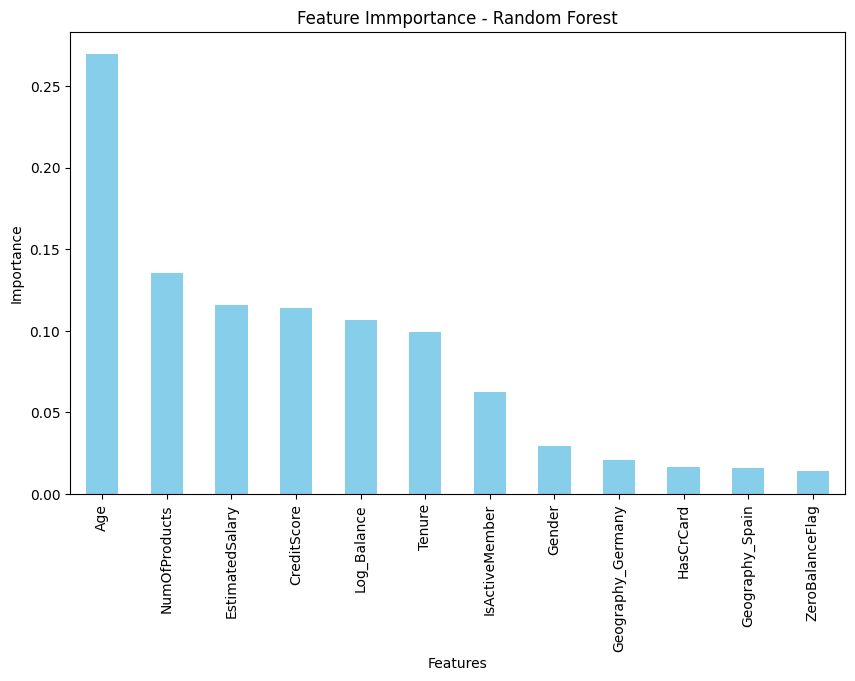

In [ ]:
#Get Feature importances {This shows which factors matter most in predicting churn (e.g., age, credit score, balance, etc)}
importances = rf_model.feature_importances_
features = X_train.columns

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_imp.plot(kind='bar', color='skyblue')
plt.title('Feature Immportance - Random Forest')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [44]:
import joblib
joblib.dump(rf_model, 'churn_prediction_model.pkl')

['churn_prediction_model.pkl']

In [47]:
df.to_csv("final_cleaned_data.csv", index=False)

In [52]:
def predict_churn(input_data, model):
    columns = ['CreditScore', 'Gender', 'Age', 'Tenure', 'NumOfProducts',
               'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
               'ZeroBalanceFlag', 'Log_Balance',
               'Geography_Germany', 'Geography_Spain']
    
    input_df = pd.DataFrame([input_data], columns=columns)
    prediction = model.predict(input_df)
    return "Exited" if prediction[0] == 1 else "Retained"


In [53]:
sample_data = [600, 1, 40, 3, 2, 1, 1, 50000, 11.0, 1, 0, 1]
print(predict_churn(sample_data, rf_model))

Exited


In [51]:
print(X_train_res.columns.tolist())


['CreditScore', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'ZeroBalanceFlag', 'Log_Balance', 'Geography_Germany', 'Geography_Spain']


In [55]:
# Step 1: Copy the cleaned dataframe
df_final = df.copy()

# Step 2: Define the exact features used during model training
feature_columns = ['CreditScore', 'Gender', 'Age', 'Tenure', 'NumOfProducts',
                   'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
                   'ZeroBalanceFlag', 'Log_Balance',
                   'Geography_Germany', 'Geography_Spain']

# Step 3: Predict using only those features
df_final['Predicted_Churn'] = rf_model.predict(df_final[feature_columns])

# Step 4: Map 0/1 to labels
df_final['Predicted_Churn'] = df_final['Predicted_Churn'].map({1: 'Exited', 0: 'Retained'})

# Step 5: Save the new dataframe with predictions
df_final.to_csv("final_predictions.csv", index=False)
